In [8]:
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots
import dash
import dash_html_components as html

In [ ]:
import dash
import plotly.express as px
import dash_core_components as dcc

In [9]:
gapminder = px.data.gapminder()
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

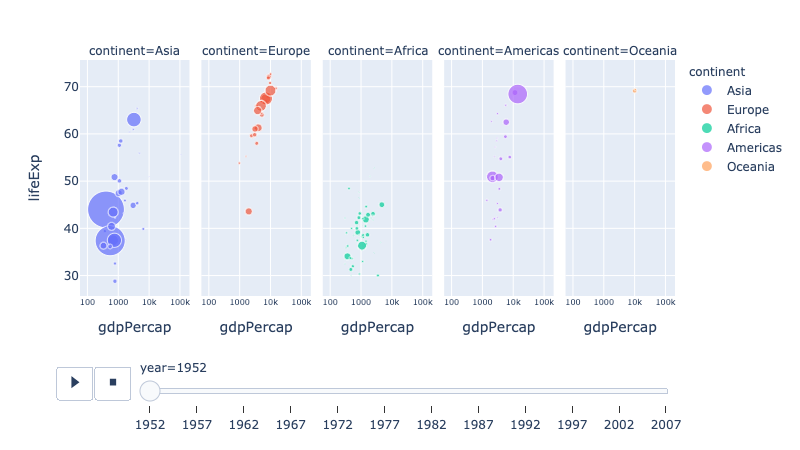

In [10]:
facet_fig =px.scatter(gapminder, x='gdpPercap', y='lifeExp',  log_x=True, hover_name="country",
          size="pop", size_max=40, color="continent",
          facet_col="continent",
          width=800,
          animation_frame="year")
facet_fig.update_xaxes(tickfont={"size":8})
facet_fig.show()

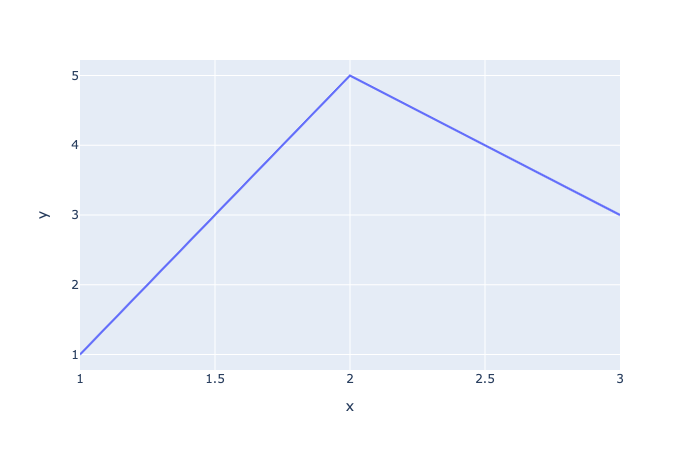

In [11]:
df = pd.DataFrame([[1,1], [2,5],[3,3]], columns=["x","y"])
px.line(df, x="x", y="y").show()

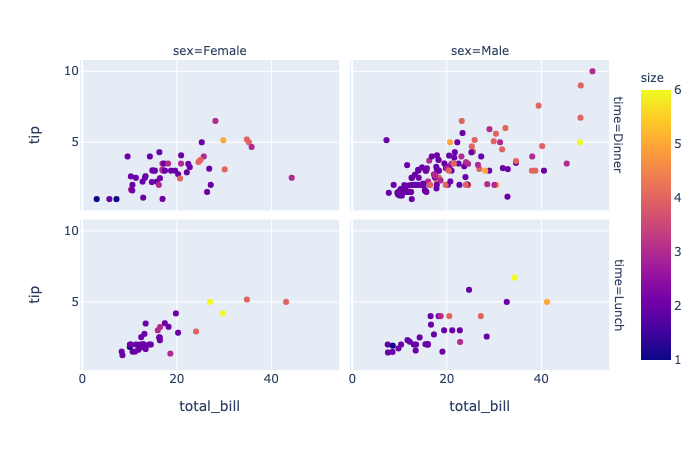

In [12]:
tips = px.data.tips()
px.scatter(tips, x="total_bill", y='tip', color="size",facet_row="time", facet_col="sex").show()

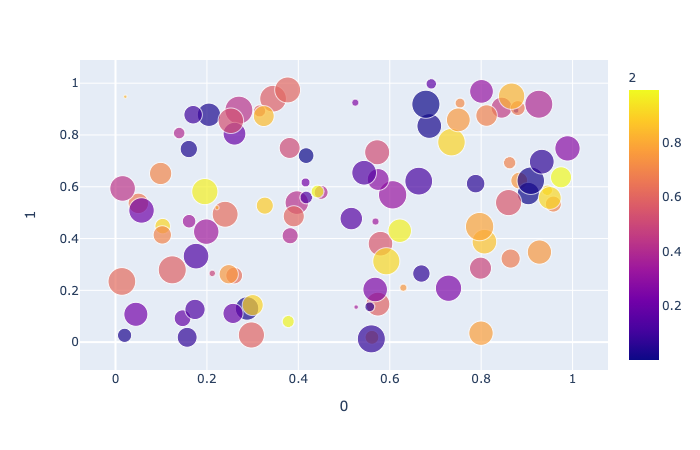

In [13]:
np.random.seed(1)
arr= np.random.rand(100, 4)
px.scatter(arr, x=0 , y=1, color=2, size=3).show()

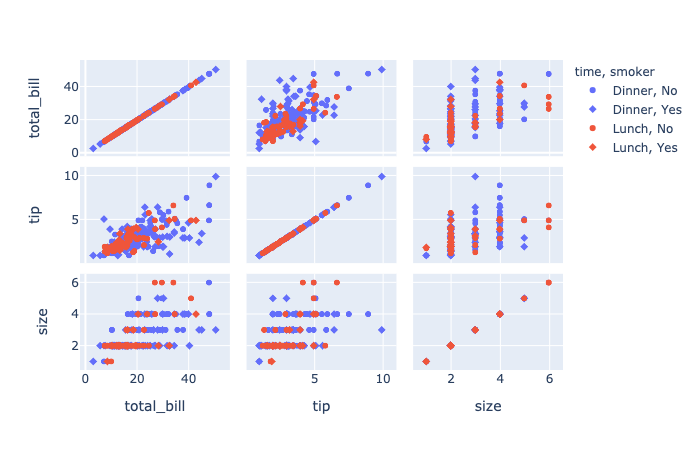

In [14]:
scatter_matrix_fig=px.scatter_matrix(
    tips,
    dimensions=["total_bill","tip","size"],
    color="time",
    symbol="smoker",
).show()

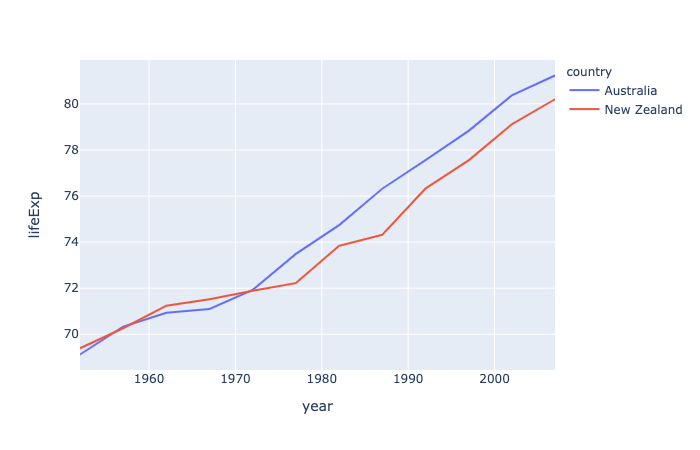

In [15]:
gapminder_Oceania = gapminder.loc[gapminder["continent"]=="Oceania"]
px.line(
gapminder_Oceania,
x="year",
y="lifeExp",
color="country").show()

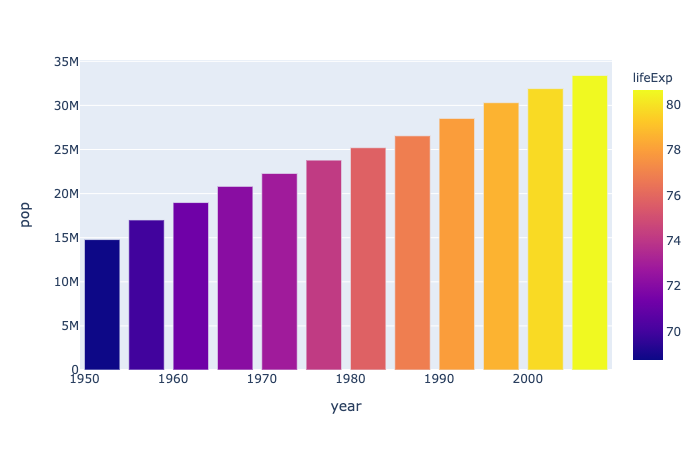

In [16]:
gapminder_Canada = gapminder.loc[gapminder["country"]=="Canada"]
px.bar(
gapminder_Canada,
x="year",
y="pop",
color="lifeExp",
hover_data=["lifeExp","gdpPercap"]).show()

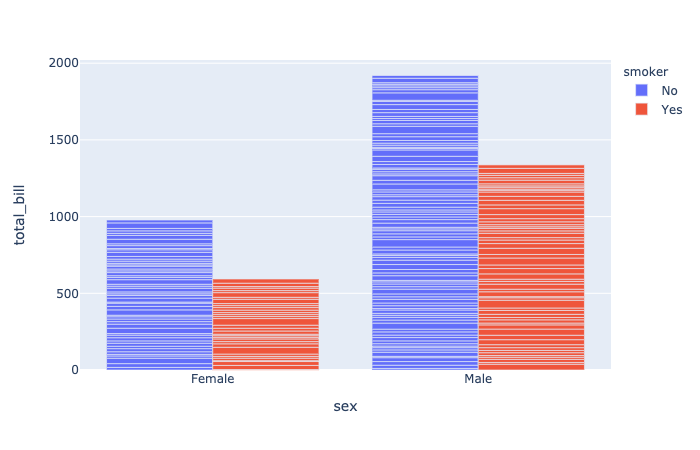

In [17]:
px.bar(
tips,
x="sex",
y="total_bill",
color="smoker",
barmode="group").show()

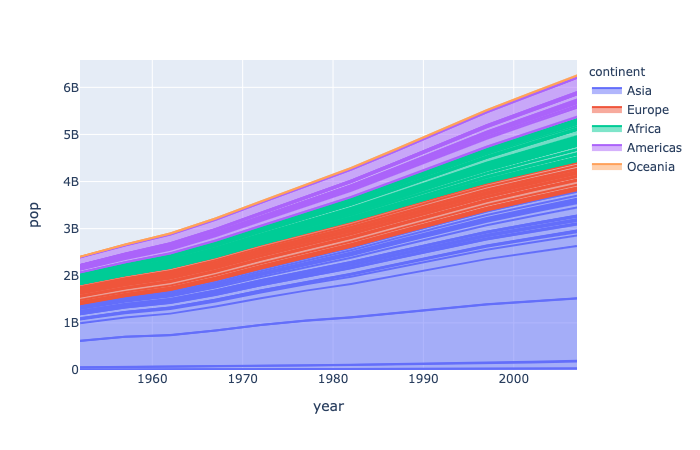

In [18]:
px.area(
gapminder,
x="year",
y="pop",
color="continent",
line_group="country").show()

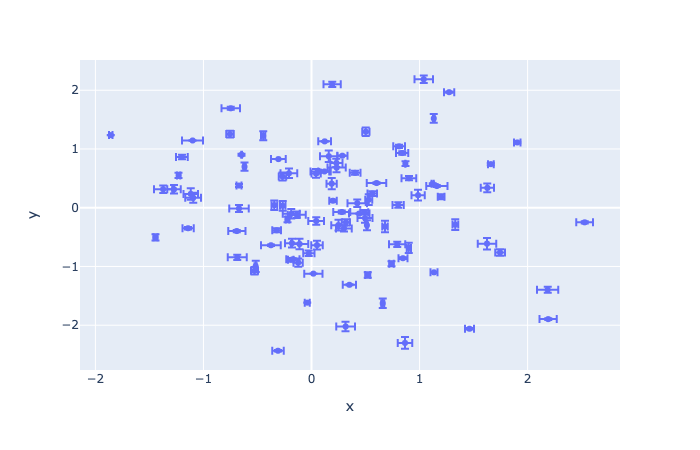

In [19]:
np.random.seed(1)
df = pd.DataFrame(np.random.randn(100,2),columns=['x','y'])
px.scatter(
df,x="x",y="y",error_x=np.random.rand(100)*0.1,error_y=np.random.rand(100)*0.1).show()

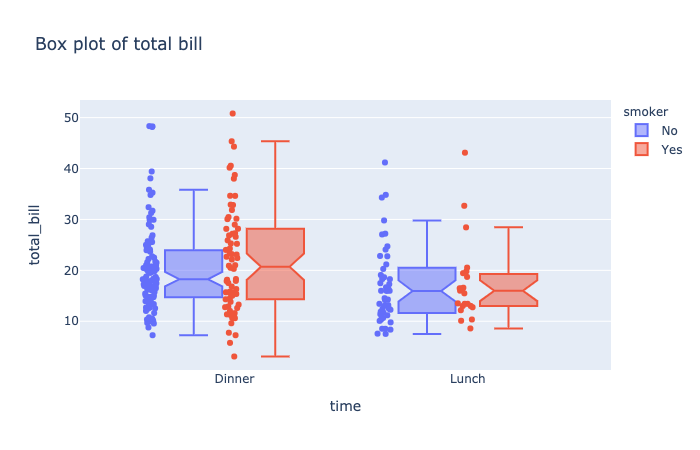

In [20]:
px.box(tips, x="time", y="total_bill",color="smoker" , notched=True,points="all",title="Box plot of total bill", hover_data=["day"]).show()

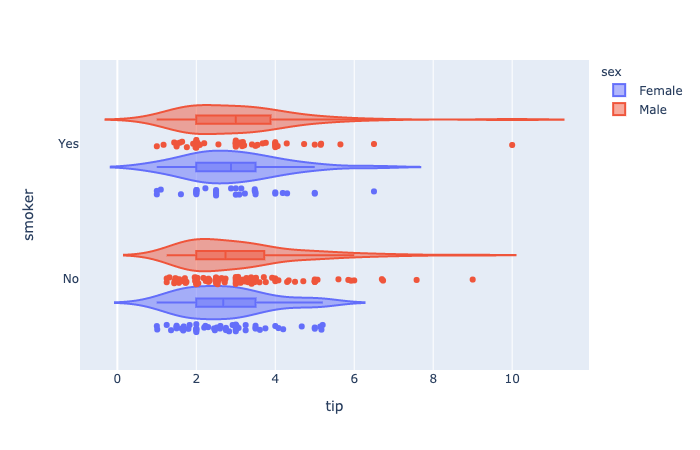

In [21]:
px.violin(tips, x="tip", y="smoker",color="sex" , box=True, points="all", hover_data=tips.columns,).show()

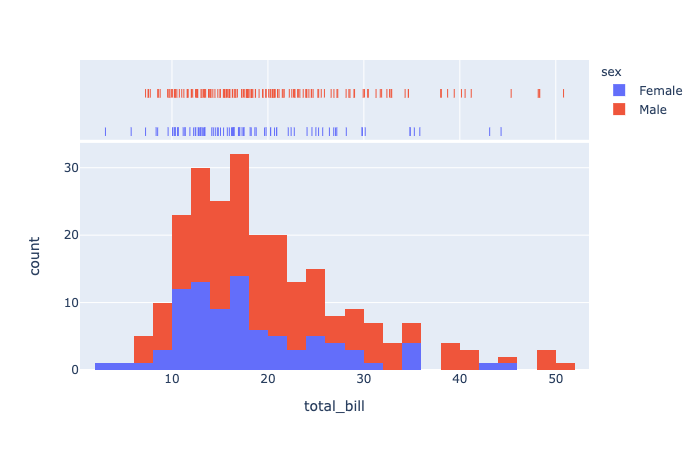

In [22]:
px.histogram(
tips,
x="total_bill",
color="sex",
marginal="rug",
 hover_data=tips.columns,).show()

In [23]:
iris= px.data.iris()

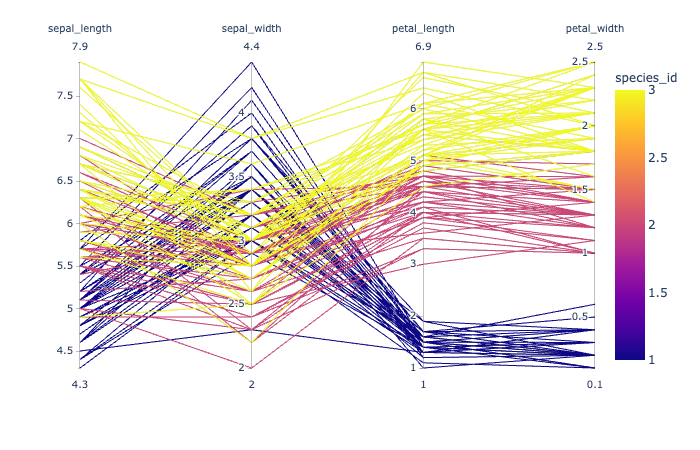

In [24]:
px.parallel_coordinates(
iris,
dimensions=["sepal_length","sepal_width","petal_length","petal_width"],
color="species_id",)

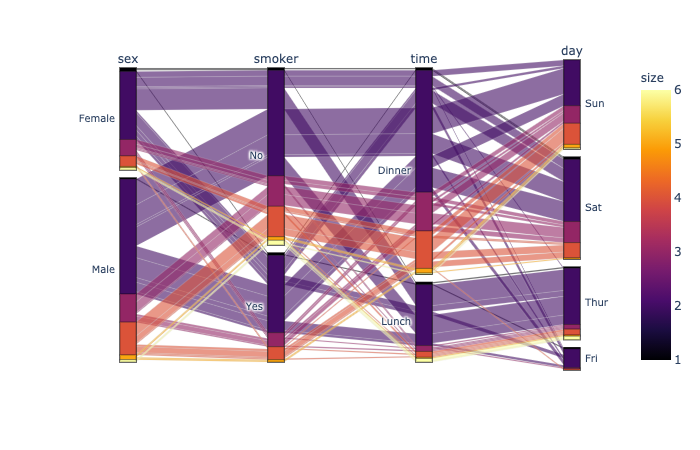

In [25]:
px.parallel_categories(
tips,
dimensions=["sex","smoker","time","day"],
color="size",
color_continuous_scale=px.colors.sequential.Inferno,).show()

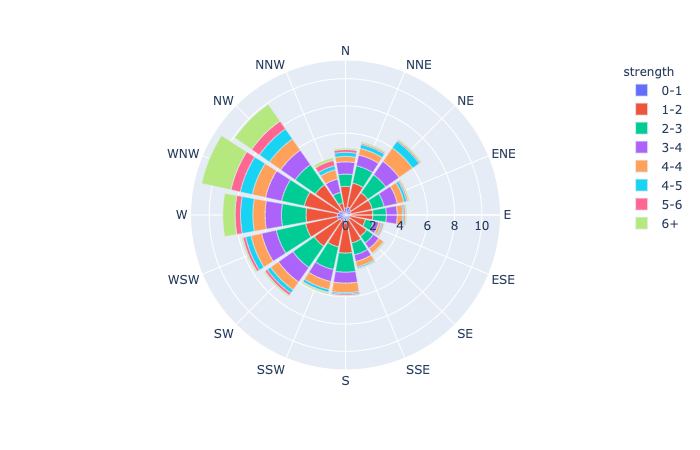

In [26]:
wind = px.data.wind()
px.bar_polar(
wind,
r = "frequency",
theta="direction",
color="strength",).show()

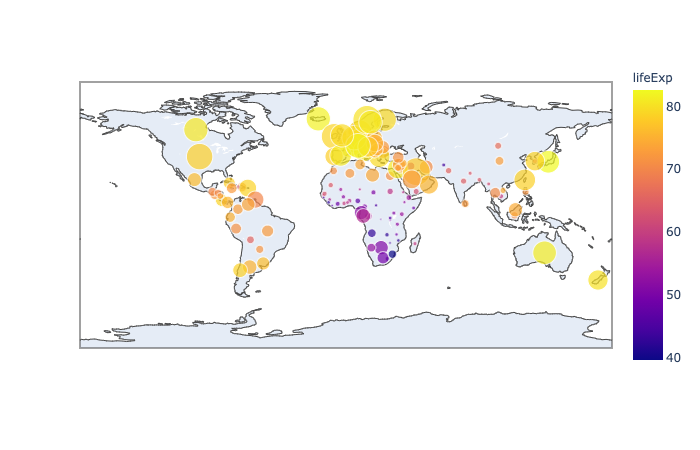

In [27]:
gapminder_2007= gapminder[gapminder["year"]==2007]
px.scatter_geo(
gapminder_2007,
locations="iso_alpha",
size="gdpPercap",
color="lifeExp",
hover_name="country",).show()

In [28]:
stocks = plotly.data.stocks()
stocks.head()

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0  2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2  2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3  2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4  2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708

In [29]:
import plotly.graph_objects as go
import plotly
ts_layout = go.Layout(
xaxis={
    "rangeslider":{"visible":True},
    "rangeselector":{
        "buttons":[
            {"label":"1m","step":"month","count":1},
            {"label":"7d","step":"day","count":7},
            {"step":"all"}
        ]
    }
}
)
go.Figure(
    go.Scatter(x=stocks["date"], y=stocks["GOOG"]),layout=ts_layout).show()

In [30]:
interp_x, interp_y = np.array([1,2,3]), np.array([1,3,2])
line_shapes= "linear","spline", "hv","vh","hvh","vhv"
interp_fig = make_subplots(rows=6, cols=1, subplot_titles=line_shapes)
for i , shape_name in enumerate(line_shapes, 1):
    interp_fig.add_trace(
    go.Scatter(
    x = interp_x,
    y = interp_y,
    name=shape_name,
    line={"shape":shape_name},
    hovertext=shape_name,
    ),
    row=i,
    col=1,
    )
interp_fig.show()

In [31]:
line_trace = go.Scatter(x=[0,1,2], y=[5,3,4], name="line")
scatter_trace = go.Scatter(x=[1,2,3], y=[2,1,5], mode="markers", name="scatter")
bar_trace=go.Bar(x=[1,2,3], y=[1,2,3], name="bar")
area_trace = go.Scatter(
    x=[3,4,5],
    y=[5,3,4],
    mode="none",
    fillcolor="#1f77b4",
    fill="tozeroy",
    name="area"
)
subplots_fig = make_subplots(rows=2, cols=2)
subplots_fig.add_trace(line_trace,row=1,col=1)
subplots_fig.add_trace(scatter_trace,row=1,col=2)
subplots_fig.add_trace(bar_trace,row=2,col=1)
subplots_fig.add_trace(area_trace,row=2,col=2)
subplots_fig.show()